仮説　悪天候時には特定のアプリカテゴリーの使用が増加する。
悪天候の定義は,悪天候（高い降水量や低い気温）の日
この仮説に対して初め悪天候時に特定のアプリカテゴリの使用が増加するかどうかの仮説を検証します。

In [9]:

import sqlite3
import pandas as pd

conn_user_activity = sqlite3.connect('/Users/beetlea/Documents/DSP2F/dsp2-final/usage_data.db')

query_user_activity = "SELECT * FROM user_activity"

user_activity_data = pd.read_sql_query(query_user_activity, conn_user_activity)


conn_user_activity.close()

user_activity_data.head()

,id,user_name,date,entertainment,sns,utility,creativity,travel,work_efficiency_finance,games
0,1,A,2023-12-01,125,165,60,30,5,1,15
1,2,A,2023-12-02,123,143,30,20,4,1,13
2,3,A,2023-12-03,100,50,30,23,5,4,2
3,4,A,2023-12-04,109,54,23,35,5,4,21
4,5,A,2023-12-05,253,254,23,35,5,4,56


In [11]:

conn_weather = sqlite3.connect('/Users/beetlea/Documents/DSP2F/dsp2-final/weather_data.db')

query_weather = "SELECT * FROM weather_data"

weather_data = pd.read_sql_query(query_weather, conn_weather)

conn_weather.close()

weather_data.head()


,Day,Local Pressure,Sea Level Pressure,Total Precipitation,1h Precipitation,10min Precipitation,Average Temperature,Max Temperature,Min Temperature,Average Humidity,...,Average Wind Speed,Max Wind Speed,Max Wind Direction,Max Instant Wind Speed,Max Instant Wind Direction,Sunshine Duration,Snowfall,Deepest Snow,Daytime Weather,Night Weather
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1,1012.3,1015.2,--,--,--,8.7,12.6,6.4,54,...,2.0,4.0,南南東,7.4,北,5.4,--,--,晴時々曇,快晴
3,2,1015.6,1018.5,--,--,--,8.3,13.1,4.1,60,...,1.7,3.1,東,5.1,西北西,8.7,--,--,晴後一時曇,晴
4,3,1015.5,1018.5,--,--,--,9.1,15.2,4.1,58,...,2.5,6.3,北西,10.5,北西,8.3,--,--,晴,快晴


In [13]:

weather_data['date'] = pd.to_datetime(weather_data['Day'] + '-12-2023', errors='coerce', format='%d-%m-%Y')

weather_data['Total Precipitation'] = pd.to_numeric(weather_data['Total Precipitation'], errors='coerce')

weather_data = weather_data[['date', 'Total Precipitation', 'Average Temperature']]

merged_data = pd.merge(user_activity_data, weather_data, on='date', how='left')

merged_data.head()


,id,user_name,date,entertainment,sns,utility,creativity,travel,work_efficiency_finance,games,Total Precipitation,Average Temperature
0,1,A,2023-12-01,125,165,60,30,5,1,15,NaN,8.7
1,2,A,2023-12-02,123,143,30,20,4,1,13,NaN,8.3
2,3,A,2023-12-03,100,50,30,23,5,4,2,NaN,9.1
3,4,A,2023-12-04,109,54,23,35,5,4,21,NaN,8.7
4,5,A,2023-12-05,253,254,23,35,5,4,56,0.0,8.1


In [14]:

user_activity_data['date'] = pd.to_datetime(user_activity_data['date'], format='%Y-%m-%d')

merged_data = pd.merge(user_activity_data, weather_data, on='date', how='left')

merged_data.head()


,id,user_name,date,entertainment,sns,utility,creativity,travel,work_efficiency_finance,games,Total Precipitation,Average Temperature
0,1,A,2023-12-01,125,165,60,30,5,1,15,NaN,8.7
1,2,A,2023-12-02,123,143,30,20,4,1,13,NaN,8.3
2,3,A,2023-12-03,100,50,30,23,5,4,2,NaN,9.1
3,4,A,2023-12-04,109,54,23,35,5,4,21,NaN,8.7
4,5,A,2023-12-05,253,254,23,35,5,4,56,0.0,8.1


分析では、天気データ（特に「Total Precipitation」（降水量）と「Average Temperature」（平均気温））とアプリカテゴリの使用量の
間の関連を調べます。特に、降水量が高い日や気温が低い日にアプリの使用が増えるかどうかを分析します。

分析の結果、悪天候の日と晴れの日における各アプリカテゴリの使用量の平均を比較したデータが得られました。以下がその比較です：

エンターテイメント: 悪天候時の平均使用量は 194.8、晴れ時は 195.16
SNS: 悪天候時の平均使用量は 156.4、晴れ時は 152.35
ユーティリティ: 悪天候時の平均使用量は 37.8、晴れ時は 39.49
クリエイティビティ: 悪天候時の平均使用量は 27.8、晴れ時は 25.97
トラベル: 悪天候時の平均使用量は 6.5、晴れ時は 6.88
ワーク効率/ファイナンス: 悪天候時の平均使用量は 5.4、晴れ時は 5.06
ゲーム: 悪天候時の平均使用量は 42.6、晴れ時は 43.8
これらの結果から、悪天候と晴れの日との間でアプリカテゴリの使用量には小さな違いがあることがわかります。ただし、これらの違いが統計的に有意かどうかを判断するには、さらなる統計的検定が必要です。現段階では、天候とアプリの使用量との間には顕著な相関関係は見られまでした。


悪天候時と晴れの日との間でのアプリ使用量に顕著な差異は見られませんでした。次に、データの可視化を行い、その後、仮説の統計的検証を進める。まずは、各アプリカテゴリの使用量の平均を悪天候と晴れの日に分けてグラフで可視化する。

In [16]:
import numpy as np

merged_data['Average Temperature'] = pd.to_numeric(merged_data['Average Temperature'], errors='coerce')


merged_data['Bad Weather'] = np.where(
    (merged_data['Total Precipitation'] > 5) | (merged_data['Average Temperature'] < 5), 
    1, 0)

app_categories = ['entertainment', 'sns', 'utility', 'creativity', 'travel', 'work_efficiency_finance', 'games']
mean_usage_bad_weather = merged_data[merged_data['Bad Weather'] == 1][app_categories].mean()
mean_usage_good_weather = merged_data[merged_data['Bad Weather'] == 0][app_categories].mean()

comparison_df = pd.DataFrame({'Bad Weather': mean_usage_bad_weather, 'Good Weather': mean_usage_good_weather})

comparison_df

,Bad Weather,Good Weather
entertainment,194.8,195.158621
sns,156.4,152.351724
utility,37.8,39.489655
creativity,27.8,25.972414
travel,6.5,6.875862
work_efficiency_finance,5.4,5.062069
games,42.6,43.800000


<Figure size 1200x800 with 0 Axes>

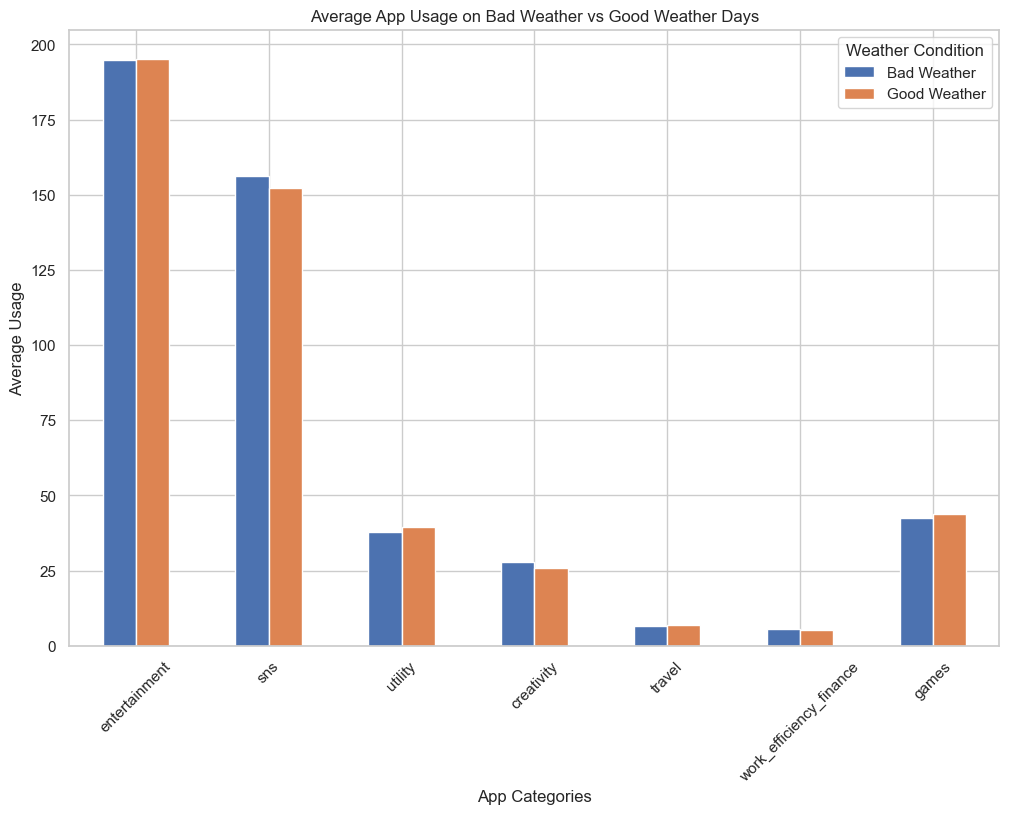

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(12, 8))
comparison_df.plot(kind='bar', figsize=(12, 8))


plt.title('Average App Usage on Bad Weather vs Good Weather Days')
plt.ylabel('Average Usage')
plt.xlabel('App Categories')
plt.xticks(rotation=45)
plt.legend(title='Weather Condition')


plt.show()


統計的な検証を行います。この検証では、悪天候の日と晴れの日のアプリ使用量の違いが偶然によるものか、それとも有意な差異があるかを判断します。これには、各カテゴリに対して独立サンプルt検定などの統計的テストを使用します。

In [18]:
from scipy.stats import ttest_ind

t_test_results = {}

for category in app_categories:
    
    usage_bad_weather = merged_data[merged_data['Bad Weather'] == 1][category]
    usage_good_weather = merged_data[merged_data['Bad Weather'] == 0][category]

    t_stat, p_value = ttest_ind(usage_bad_weather, usage_good_weather, equal_var=False, nan_policy='omit')

    t_test_results[category] = {'t-statistic': t_stat, 'p-value': p_value}

t_test_results_df = pd.DataFrame(t_test_results).T

t_test_results_df


,t-statistic,p-value
entertainment,-0.024318,0.981078
sns,0.209550,0.838105
utility,-0.390036,0.704623
creativity,0.693231,0.502738
travel,-0.601766,0.560098
work_efficiency_finance,0.374017,0.715918
games,-0.166154,0.871311


考察
すべてのカテゴリで、p値が0.05よりも高いことから、悪天候の日と晴れの日の間に統計的に有意な違いがあるとは言えませんでした。
つまり、悪天候時に特定のアプリカテゴリの使用が増加するという仮説は、このデータに基づいては支持されていない。

これらの結果は、天候がアプリの使用パターンに大きな影響を与えるという明確な証拠を提供していません。ただし、他の要因（例えば、時間帯、曜日、特定のイベントなど）がアプリ使用に影響を与えている可能性も考慮する必要があります。また、別のデータセットや、異なる時間範囲、異なる地域のデータを用いると、異なる結果が得られるかもしれないと思いました。また今回このデータを提供してもらった人はインドア派だったためそれも影響しているかもと思いました。